In [1]:
file_name = 'hiphop.00055.wav'

In [2]:
!pip install musicnn

  Using cached musicnn-0.1.0-py3-none-any.whl (29.3 MB)
  Using cached tensorflow-2.11.0-cp39-cp39-macosx_10_14_x86_64.whl (244.3 MB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Using cached librosa-0.9.1-py3-none-any.whl (213 kB)
  Using cached librosa-0.9.0-py3-none-any.whl (211 kB)
  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached tensorflow-2.10.1-cp39-cp39-macosx_10_14_x86_64.whl (241.2 MB)
  Using cached tensorflow-2.10.0-cp39-cp39-macosx_10_14_x86_64.whl (241.2 MB)
  Using cached tensorflow-2.9.3-cp39-cp39-macosx_10_14_x86_64.whl (228.6 MB)
  Using cached tensorflow-2.9.2-cp39-cp39-macosx_10_14_x86_64.whl (228.6 MB)
  Using cached tensorflow-2.9.1-cp39-cp39-macosx_10_14_x86_64.whl (228.5 MB)
  Using cached tensorflow-2.9.0-cp39-cp39-macosx_10_14_x86_64.whl (228.5 MB)
  Using cached tensorflow-2.8.4-cp39-cp39-mac

In [3]:
from musicnn.extractor import extractor
taggram, tags, features = extractor(file_name, model='MTT_musicnn', extract_features=True)

/home/raivo/Documents/JupyterML/venv/lib/python3.10/site-packages/musicnn-0.1.0-py3.10.egg/musicnn/models.py:58: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  normalized_input = tf.compat.v1.layers.batch_normalization(expand_input, training=is_training)
2022-12-29 09:46:04.992866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 09:46:05.028004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-12-29 09:46:05.028022: W tensorflow

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!


In [4]:
list(features.keys())

['timbral',
 'temporal',
 'cnn1',
 'cnn2',
 'cnn3',
 'mean_pool',
 'max_pool',
 'penultimate']

In [5]:
import numpy as np
frontend_features = np.concatenate([features['temporal'], features['timbral']], axis=1)

In [6]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

def depict_features(features, coordinates, title, aspect='auto', xlabel=True, fontsize=13):
    # plot features in coordinates
    ax = plt.subplot(coordinates)
    plt.imshow(features.T, interpolation=None, aspect=aspect)
    # set title
    ax.title.set_text(title + ' (' + str(features.shape[1]) + ')' )
    ax.title.set_fontsize(fontsize)
    # y-axis
    ax.get_yaxis().set_visible(False)
    # x-axis
    x_label = np.arange(0, features.shape[0], features.shape[0]//5)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, fontsize=fontsize)
    if xlabel:
        ax.set_xlabel('(time frames)', fontsize=fontsize)

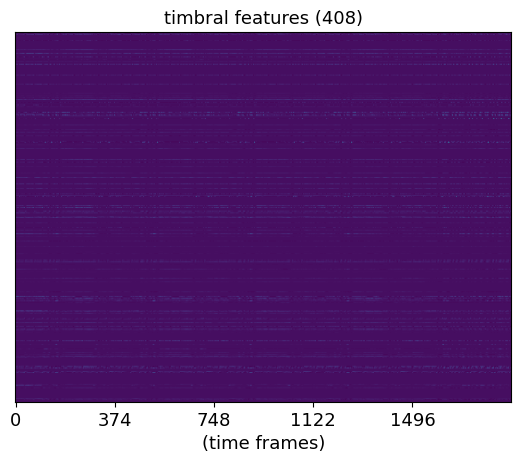

In [7]:
gs = gridspec.GridSpec(1, 1) # create a figure having 1 rows and 1 cols.
depict_features(features=features['timbral'],
                coordinates=gs[0, 0],
                title='timbral features',
                aspect='auto')
plt.show()

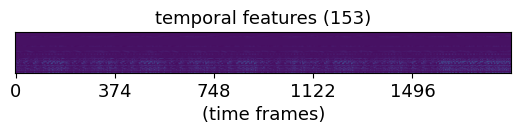

In [8]:
gs = gridspec.GridSpec(1, 1) # create a figure having 1 rows and 3 cols.
depict_features(features=features['temporal'],
                coordinates=gs[0, 0],
                title='temporal features',
                aspect='equal')
plt.show()

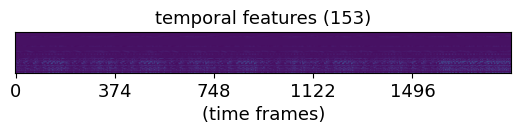

In [9]:
gs = gridspec.GridSpec(1, 1) # create a figure having 1 rows and 3 cols.
depict_features(features=features['temporal'],
                coordinates=gs[0, 0],
                title='temporal features',
                aspect='equal')
plt.show()